# Business Understanding

Preparing meals is often a challenge due to individual preferences, dietary needs, and ingredient availability. This project aims to develop a Personalized Recipe Recommendation System that uses machine learning and NLP to suggest relevant recipes tailored to each user. The system is designed to enhance convenience, promote healthier eating habits, and reduce food waste. It has potential applications in health tech, food delivery platforms, and smart kitchen systems.


# Problem Statement
To develop a Personalized Recipe Recommendation System that leverages machine learning and NLP

#Objectives

1.   To develop a content-based model using NLP to recommend recipes based on ingredients and instructions.
2.   To build a collaborative filtering model using user ratings and interactions.
3.   To combine both approaches into a hybrid recommendation system.
4.   To evaluate model performance

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install isodate


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from isodate import parse_duration
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the recipes and reviews from the Parquet files
df_recipes = pd.read_parquet("recipes.parquet")
df_reviews = pd.read_parquet("reviews.parquet")


# Data Understanding


In [6]:
print("Recipes:", df_recipes.shape)
print("Reviews:", df_reviews.shape)

Recipes: (522517, 28)
Reviews: (1401982, 8)


In [7]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    522517 non-null  float64            
 1   Name                        522517 non-null  object             
 2   AuthorId                    522517 non-null  int32              
 3   AuthorName                  522517 non-null  object             
 4   CookTime                    439972 non-null  object             
 5   PrepTime                    522517 non-null  object             
 6   TotalTime                   522517 non-null  object             
 7   DatePublished               522517 non-null  datetime64[us, UTC]
 8   Description                 522512 non-null  object             
 9   Images                      522516 non-null  object             
 10  RecipeCategory              521766 non-null 

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int32              
 1   RecipeId       1401982 non-null  int32              
 2   AuthorId       1401982 non-null  int32              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int32              
 5   Review         1401982 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[us, UTC]
 7   DateModified   1401982 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](2), int32(4), object(2)
memory usage: 64.2+ MB


In [9]:
df_recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [10]:
df_reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


In [11]:
df_recipes.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                           0
RecipeIngredientQuantities         0
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [12]:
df_reviews.isnull().sum()

ReviewId         0
RecipeId         0
AuthorId         0
AuthorName       0
Rating           0
Review           0
DateSubmitted    0
DateModified     0
dtype: int64

# Data Cleaning

In [13]:
#Handling Missing Values
df_recipes['AggregatedRating'] = df_recipes['AggregatedRating'].fillna(0)
df_recipes['ReviewCount'] = df_recipes['ReviewCount'].fillna(0)
df_recipes['RecipeServings'] = df_recipes['RecipeServings'].fillna(df_recipes['RecipeServings'].median())
df_recipes['RecipeCategory'] = df_recipes['RecipeCategory'].fillna("Unknown").str.lower().str.strip()

df_reviews.dropna(subset=['Review'], inplace=True)

In [14]:
# Converting the time to minutes
def safe_parse_minutes(x):
    if pd.isnull(x) or not isinstance(x, str) or not x.startswith('P'):
        return 0
    try:
        return parse_duration(x).total_seconds() / 60
    except:
        return 0

df_recipes['CookTimeMinutes'] = df_recipes['CookTime'].apply(safe_parse_minutes)
df_recipes['PrepTimeMinutes'] = df_recipes['PrepTime'].apply(safe_parse_minutes)
df_recipes['TotalTimeMinutes'] = df_recipes['TotalTime'].apply(safe_parse_minutes)

In [15]:
# Filling missing time with 0
df_recipes[['CookTimeMinutes', 'PrepTimeMinutes', 'TotalTimeMinutes']] = df_recipes[
    ['CookTimeMinutes', 'PrepTimeMinutes', 'TotalTimeMinutes']
].fillna(0)

In [16]:
# Drop rows where total time is less than 0
df_recipes = df_recipes[df_recipes['TotalTimeMinutes'] > 0]


In [17]:
# Convert numpy arrays to regular lists
df_recipes['Ingredients'] = df_recipes['RecipeIngredientParts'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df_recipes['Quantities'] = df_recipes['RecipeIngredientQuantities'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

In [18]:
#Convert Text to Lowercase & Clean
for text_col in ['Name', 'Description', 'RecipeInstructions','Keywords']:
    df_recipes[text_col] = df_recipes[text_col].astype(str).str.lower().str.replace(r'[^a-z\s]', '', regex=True)


In [19]:
#Tokenize Keywords into List Format
df_recipes['KeywordList'] = df_recipes['Keywords'].apply(lambda x: x.split())

In [20]:
df_reviews['Rating'] = df_reviews['Rating'].astype(float)

In [21]:
# Drop duplicate recipes and reviews
df_recipes.drop_duplicates(subset=['RecipeId'], inplace=True)
df_reviews.drop_duplicates(subset=['ReviewId'], inplace=True)


In [22]:
#Drop Recipes with Few reviews
MIN_REVIEWS = 5
popular_recipes = df_reviews['RecipeId'].value_counts()
popular_recipes = popular_recipes[popular_recipes >= MIN_REVIEWS].index
df_recipes = df_recipes[df_recipes['RecipeId'].isin(popular_recipes)]
df_reviews = df_reviews[df_reviews['RecipeId'].isin(popular_recipes)]


In [23]:
# Drop unnecesary cols
drop_cols = ['AuthorName', 'TotalTime', 'PrepTime','CookTime','RecipeIngredientParts','RecipeIngredientQuantities','RecipeYield','Keywords']
df_recipes.drop(columns=drop_cols, inplace=True, errors='ignore')

drop_cols2 = ['AuthorName']
df_reviews.drop(columns=drop_cols2, inplace=True, errors='ignore')

In [24]:
recipes_clean=df_recipes
reviews_clean=df_reviews

In [25]:
missing_recipe_ids = reviews_clean[~reviews_clean['RecipeId'].isin(recipes_clean['RecipeId'])]
print(f"Number of reviews with RecipeId not in recipes: {len(missing_recipe_ids)}")


Number of reviews with RecipeId not in recipes: 4079


In [26]:
missing_author_ids = reviews_clean[~reviews_clean['AuthorId'].isin(recipes_clean['AuthorId'])]
print(f"Number of reviews with AuthorId not in recipes: {len(missing_author_ids)}")


Number of reviews with AuthorId not in recipes: 532306


In [27]:
# Create a set of valid (RecipeId, AuthorId) pairs from the recipes dataset
valid_pairs = set(zip(recipes_clean['RecipeId'], recipes_clean['AuthorId']))

# Check which rows in reviews don't have a matching pair
invalid_pairs = reviews_clean[~reviews_clean.apply(lambda row: (row['RecipeId'], row['AuthorId']) in valid_pairs, axis=1)]

print(f"Number of reviews with unmatched RecipeId & AuthorId pairs: {len(invalid_pairs)}")


Number of reviews with unmatched RecipeId & AuthorId pairs: 1028061


In [28]:
# Keep only reviews with RecipeIds that exist in recipes
valid_reviews = reviews_clean[reviews_clean['RecipeId'].isin(recipes_clean['RecipeId'])].copy()

print(f"Remaining reviews after filtering: {len(valid_reviews)}")


Remaining reviews after filtering: 1024428


In [40]:
# Merge on RecipeId
merged_df = pd.merge(
    valid_reviews,
    recipes_clean,
    on='RecipeId',
    how='inner',
    suffixes=('_review', '_recipe')
)

print(f"Merged dataset shape: {merged_df.shape}")
print(merged_df[['RecipeId', 'AuthorId_review', 'AuthorId_recipe']].head())


Merged dataset shape: (1024428, 32)
   RecipeId  AuthorId_review  AuthorId_recipe
0       992             2008             1545
1      4523             2046             1932
2      7435             1773             1986
3        44             2085             1596
4     13307             2046            20914


In [41]:
# drop AuthorId_review - we are more interested in the authors of the recipes
drop_cols3 = ['AuthorId_review']
merged_df.drop(columns=drop_cols3, inplace=True, errors='ignore')

In [42]:
# Convert to datetime to short date
merged_df['DateSubmitted'] = pd.to_datetime(merged_df['DateSubmitted'])

# subset data where year >= 2018
merged_df= merged_df[merged_df['DateSubmitted'].dt.year >= 2018]

merged_df.head()

,ReviewId,RecipeId,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_recipe,DatePublished,Description,...,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,CookTimeMinutes,PrepTimeMinutes,TotalTimeMinutes,Ingredients,Quantities,KeywordList
34429,52806,33113,5.0,"This was great,loved it! I also made your Orie...",2020-01-14 01:37:19+00:00,2020-01-14 01:37:19+00:00,thai dipping sauce for spring wrap or egg rolls,4470,2002-07-03 20:11:00+00:00,this is very tasty and low fat dipping sauce ...,...,3.9,0.1,14.0,whisk together all the ingredients in a small ...,10.0,5.0,15.0,"[water, cornstarch, seasoned rice vinegar, bro...","[3⁄4, 2, 1⁄3, 1⁄4, 1 1⁄2, 1, 2, 1⁄2]","[beans, thai, asian, mins, for, large, groups,..."
89401,131383,51716,5.0,"Halfed the butter, used light sour cream and i...",2018-09-27 18:52:00+00:00,2018-09-27 18:52:00+00:00,corn casserole,67986,2003-01-16 20:19:00+00:00,if you like the star sour cream cornbread reci...,...,13.3,18.0,4.0,in large bowl mix together butter sour cream a...,60.0,5.0,65.0,"[butter, sour cream, egg, whole kernel corn, c...","[1⁄2, 1, 1, 1, 1, 4 1⁄2, 1]","[vegetable, weeknight, oven, hours, easy]"
96040,140879,26191,5.0,Update 3/25/18: I came here to get the recipe ...,2018-03-25 19:40:52+00:00,2018-03-25 19:40:52+00:00,the best all purpose cleaner,15205,2002-04-24 09:23:00+00:00,this is by far the best all purpose cleaner iv...,...,0.0,0.0,6.0,pour ingredients into empty gallon container o...,0.0,5.0,5.0,[water],"[1, 1⁄2, 1, None]","[mins, easy]"
100503,147050,8534,5.0,I think this is my favorite pasta w/ asparagus...,2020-10-18 14:55:46+00:00,2020-10-18 14:55:46+00:00,baked pasta with asparagus pasta al forno con ...,3288,2001-01-01 21:55:00+00:00,i love fresh asparagus recipes got this one o...,...,3.6,37.1,4.0,wash asparagus remove any tough stalks and cut...,20.0,30.0,50.0,"[penne pasta, asparagus, butter, ricotta chees...","[14, 2, 4, None, None, 10, 1, 4, 3]","[cheese, vegetable, european, potluck, spring,..."
118420,172106,17344,5.0,This was Excellent! I was looking for somethin...,2020-11-08 13:13:51+00:00,2020-11-08 13:13:51+00:00,crushed saltine meatloaf,28846,2002-01-17 17:14:00+00:00,make and share this crushed saltine meatloaf r...,...,2.7,25.4,6.0,mix all of the above ingredients together unti...,45.0,15.0,60.0,"[lean ground beef, onion, green pepper, egg, t...","[1 1⁄2, 21, 1⁄3, 1⁄3, 1, 1, 1, None, None]","[meat, mins, oven]"


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38088 entries, 34429 to 1024427
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ReviewId             38088 non-null  int32              
 1   RecipeId             38088 non-null  int32              
 2   Rating               38088 non-null  float64            
 3   Review               38088 non-null  object             
 4   DateSubmitted        38088 non-null  datetime64[us, UTC]
 5   DateModified         38088 non-null  datetime64[us, UTC]
 6   Name                 38088 non-null  object             
 7   AuthorId_recipe      38088 non-null  int32              
 8   DatePublished        38088 non-null  datetime64[us, UTC]
 9   Description          38088 non-null  object             
 10  Images               38088 non-null  object             
 11  RecipeCategory       38088 non-null  object             
 12  AggregatedRating 

In [46]:
#print unique name and unique RecipeCategory

unique_categories = merged_df['RecipeCategory'].unique()

print("\nUnique Recipe Categories:")
print(unique_categories)





Unique Recipe Categories:
['sauces' 'corn' 'household cleaner' 'one dish meal' 'meatloaf'
 'chicken thigh & leg' 'roast beef' 'chicken breast' 'dessert' 'squid'
 'cheesecake' 'vegetable' 'drop cookies' 'bath/beauty' 'chicken'
 'lunch/snacks' 'beverages' 'cheese' 'pork' 'tilapia' 'spinach' 'potato'
 'very low carbs' 'black beans' 'breads' 'quick breads' 'pie'
 'kid friendly' 'rice' 'salad dressings' 'meat' 'yeast breads' 'stocks'
 'spreads' 'chowders' 'long grain rice' 'stew' 'breakfast' 'beans'
 'peppers' 'yam/sweet potato' 'lemon' 'whole chicken' '< 60 mins' 'crab'
 'lentil' 'tex mex' 'scones' 'low cholesterol' 'high protein' 'bar cookie'
 'candy' 'healthy' '< 30 mins' 'whole turkey' 'poultry' 'ham' 'clear soup'
 'smoothies' 'greens' 'whitefish' 'savory pies' 'lamb/sheep' 'european'
 'pheasant' 'oatmeal' 'curries' 'sourdough breads' '< 15 mins' 'onions'
 'white rice' 'lobster' 'steak' 'weeknight' 'low protein' 'gumbo' 'grains'
 'asian' 'penne' 'tuna' 'spicy' 'short grain rice' 'citru

In [48]:
# Define the category mapping (as shown above)
category_mapping = {
    'chicken': ['chicken', 'chicken breast', 'chicken thigh & leg', 'whole chicken', 'chicken livers'],
    'beef': ['steak', 'roast beef', 'beef organ meats', 'wild game', 'goose', 'meatballs', 'elk', 'moose', 'bear'],
    'pork': ['pork', 'ham', 'sausage', 'bacon'],
    'lamb': ['lamb/sheep'],
    'fish': ['tuna', 'halibut', 'tilapia', 'trout', 'bass', 'perch', 'salmon', 'catfish', 'mussels', 'squid', 'octopus', 'crab', 'lobster', 'shrimp', 'seafood'],
    'vegetarian': ['vegetable', 'vegan', 'tofu', 'lentil', 'beans', 'cauliflower', 'greens', 'spinach', 'broccoli', 'eggplant', 'zucchini', 'tomato', 'carrot', 'cucumber'],
    'desserts': ['dessert', 'candy', 'cheesecake', 'gelatin', 'frozen desserts', 'scones', 'cookies', 'chocolate', 'pie', 'cake', 'tarts', 'brownies', 'puddings'],
    'baked goods': ['bread', 'breads', 'quick breads', 'yeast breads', 'sourdough breads', 'rolls', 'buns', 'muffins', 'baking', 'pancakes'],
    'pasta': ['spaghetti', 'macaroni and cheese', 'penne', 'manicotti', 'pasta shells', 'lasagna'],
    'rice': ['white rice', 'brown rice', 'short grain rice', 'long grain rice', 'wild rice', 'rice', 'paella'],
    'potatoes': ['potato', 'mashed potatoes', 'sweet potato', 'yam/sweet potato'],
    'salads': ['salad', 'salad dressings', 'coleslaw', 'potato salad', 'fruit salad', 'pasta salad'],
    'soups': ['soup', 'clear soup', 'chowders', 'gumbo', 'stew', 'lentil soup', 'chicken soup'],
    'grains': ['grains', 'quinoa', 'oats', 'barley', 'couscous', 'farro', 'bulgur', 'rice'],
    'meatloaf': ['meatloaf'],
    'sauces': ['sauces', 'gravy', 'chutneys', 'barbecue sauce', 'pasta sauce'],
    'sides': ['corn', 'side dish', 'potluck', 'side salad'],
    'drinks': ['beverages', 'smoothies', 'punch beverage', 'shakes', 'milkshakes', 'smoothie bowls', 'coffee', 'tea'],
    'breakfast': ['breakfast', 'brunch', 'oatmeal', 'pancakes', 'eggs', 'waffles', 'crepes', 'granola', 'bagels'],
    'high protein': ['high protein', 'protein shakes', 'protein bars'],
    'low protein': ['low protein'],
    'healthy': ['healthy', 'low fat', 'low carb', 'low sugar', 'low cholesterol', 'heart healthy'],
    'low carb': ['very low carbs', 'low carb'],
    'low cholesterol': ['low cholesterol'],
    'high fiber': ['high fiber'],
    'gluten free': ['gluten free'],
    'dairy free': ['dairy free foods', 'lactose free'],
    'sugar free': ['sugar free', 'low sugar'],
    'holiday': ['thanksgiving', 'christmas', "st. patrick's day", 'halloween', 'easter'],
    'international': ['mexican', 'italian', 'chinese', 'indian', 'japanese', 'greek', 'thai', 'spanish', 'french', 'portuguese', 'moroccan', 'swedish', 'turkish', 'african', 'cuban', 'polynesian', 'caribbean', 'brazilian', 'german', 'lebanese', 'chilean', 'nepalese', 'ethiopian', 'venezuelan', 'neapolitan', 'cantonese', 'pakistani', 'vietnamese', 'southwestern u.s.', 'korean', 'south african', 'australian', 'chinese', 'palestinian', 'belgian', 'russian', 'hungarian', 'swiss', 'finnish', 'norwegian', 'danish'],
    'mexican': ['mexican', 'tex mex', 'southwestern u.s.'],
    'italian': ['italian', 'sicilian', 'neapolitan'],
    'asian': ['asian', 'chinese', 'japanese', 'korean', 'vietnamese', 'thai'],
    'american': ['american', 'southern', 'new england', 'midwestern', 'californian'],
    'bbq': ['bbq', 'barbecue', 'grilled', 'broil/grill'],
    'cajun': ['cajun', 'creole', 'gumbo'],
    'seafood': ['fish', 'seafood', 'shrimp', 'lobster', 'mussels'],
    'vegan': ['vegan'],
    'low fat': ['low fat'],
    'poultry': ['poultry', 'duck', 'turkey', 'chicken', 'whole turkey', 'duck breasts', 'turkey breasts'],
    'holiday': ['christmas', 'thanksgiving', 'halloween', "st. patrick's day"],
    'fruit': ['fruit', 'berries', 'apples', 'bananas', 'pears', 'pineapple', 'grapes', 'mango', 'peaches', 'strawberries', 'raspberries', 'plums', 'oranges', 'lemons', 'cherries', 'citrus'],
    'potluck': ['potluck', 'party', 'for large groups'],
    'sweets': ['sweets', 'candies', 'chocolates', 'cookies', 'brownies', 'cakes'],
    'comfort food': ['comfort food', 'mac and cheese', 'meatloaf', 'mashed potatoes'],
    'quick meals': ['quick meals', 'quick', '< 30 mins', '< 15 mins', '< 60 mins'],
    'free of allergens': ['free of...', 'egg free', 'dairy free', 'gluten free', 'lactose free', 'peanut free'],
    'canned': ['canning', 'preserving'],
    'meals in a dish': ['one dish meal'],
    'low calorie': ['low calorie', 'low fat', 'low carb'],
    'sweets and snacks': ['sweets', 'candies', 'cookies', 'chips', 'snacks'],
    'easy': ['easy', 'beginner cook', 'beginner'],
    'other': ['unknown', 'bath/beauty', 'household cleaner', 'microwave', 'mixer', 'pressure cooker', 'slow cooker', 'stove top', 'camping', 'bread machine', 'small appliance', 'holiday'],
}

# Flatten the category mapping into a lookup dictionary
lookup = {kw.lower(): group for group, keywords in category_mapping.items() for kw in keywords}

# Function to map a single category to a broader group
def map_category(category):
    if pd.isna(category):
        return 'others'  # Handling missing values
    category = category.lower()  # Convert category to lowercase
    for keyword, group in lookup.items():
        if keyword in category:  # Check if keyword is part of category
            return group  # Return the corresponding group if found
    return 'others'  # Default category if no match found

# Apply the map_category function to the RecipeCategory column and add it as a new column
merged_df['MappedCategory'] = merged_df['RecipeCategory'].apply(map_category)

# Preview the new column to make sure it's working
#print(merged_df[['RecipeCategory', 'MappedCategory']].head())
merged_df.head()


,ReviewId,RecipeId,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_recipe,DatePublished,Description,...,ProteinContent,RecipeServings,RecipeInstructions,CookTimeMinutes,PrepTimeMinutes,TotalTimeMinutes,Ingredients,Quantities,KeywordList,MappedCategory
34429,52806,33113,5.0,"This was great,loved it! I also made your Orie...",2020-01-14 01:37:19+00:00,2020-01-14 01:37:19+00:00,thai dipping sauce for spring wrap or egg rolls,4470,2002-07-03 20:11:00+00:00,this is very tasty and low fat dipping sauce ...,...,0.1,14.0,whisk together all the ingredients in a small ...,10.0,5.0,15.0,"[water, cornstarch, seasoned rice vinegar, bro...","[3⁄4, 2, 1⁄3, 1⁄4, 1 1⁄2, 1, 2, 1⁄2]","[beans, thai, asian, mins, for, large, groups,...",sauces
89401,131383,51716,5.0,"Halfed the butter, used light sour cream and i...",2018-09-27 18:52:00+00:00,2018-09-27 18:52:00+00:00,corn casserole,67986,2003-01-16 20:19:00+00:00,if you like the star sour cream cornbread reci...,...,18.0,4.0,in large bowl mix together butter sour cream a...,60.0,5.0,65.0,"[butter, sour cream, egg, whole kernel corn, c...","[1⁄2, 1, 1, 1, 1, 4 1⁄2, 1]","[vegetable, weeknight, oven, hours, easy]",sides
96040,140879,26191,5.0,Update 3/25/18: I came here to get the recipe ...,2018-03-25 19:40:52+00:00,2018-03-25 19:40:52+00:00,the best all purpose cleaner,15205,2002-04-24 09:23:00+00:00,this is by far the best all purpose cleaner iv...,...,0.0,6.0,pour ingredients into empty gallon container o...,0.0,5.0,5.0,[water],"[1, 1⁄2, 1, None]","[mins, easy]",other
100503,147050,8534,5.0,I think this is my favorite pasta w/ asparagus...,2020-10-18 14:55:46+00:00,2020-10-18 14:55:46+00:00,baked pasta with asparagus pasta al forno con ...,3288,2001-01-01 21:55:00+00:00,i love fresh asparagus recipes got this one o...,...,37.1,4.0,wash asparagus remove any tough stalks and cut...,20.0,30.0,50.0,"[penne pasta, asparagus, butter, ricotta chees...","[14, 2, 4, None, None, 10, 1, 4, 3]","[cheese, vegetable, european, potluck, spring,...",meals in a dish
118420,172106,17344,5.0,This was Excellent! I was looking for somethin...,2020-11-08 13:13:51+00:00,2020-11-08 13:13:51+00:00,crushed saltine meatloaf,28846,2002-01-17 17:14:00+00:00,make and share this crushed saltine meatloaf r...,...,25.4,6.0,mix all of the above ingredients together unti...,45.0,15.0,60.0,"[lean ground beef, onion, green pepper, egg, t...","[1 1⁄2, 21, 1⁄3, 1⁄3, 1, 1, 1, None, None]","[meat, mins, oven]",comfort food


# EDA
We will do visualizations across themes to get understanding of how the data looks.

## Visualizations for User Review Analysis
We create a histogram showing the total count of reviews under each rating. i.e. How many people rated a recipe 1-5.

The visualization indicates that most recipes were rated a solid 5 which gives confidence in the quality of the recipes.

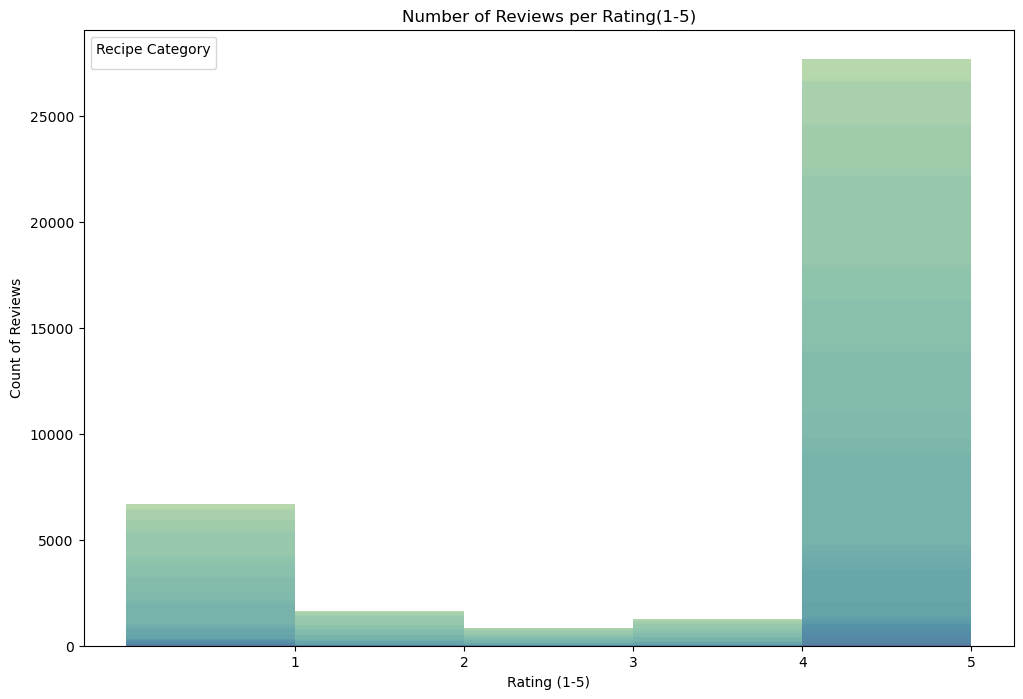

In [49]:
# Histogram of Rating Group by RecipeCategory
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_df, x='Rating', hue='MappedCategory', multiple="stack",bins=5, palette='crest', element='bars',edgecolor=None)
plt.title('Number of Reviews per Rating(1-5)')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count of Reviews')
plt.xticks(range(1, 6))
plt.legend(title='Recipe Category')
plt.show()

2.We create a Line Plot to check how rating was done over the years.


The results indicate that recipes were highest rated by users in the year 2006. and least rated in the year 2017





In [50]:
#Check unique years under DateSubmitted column
unique_years = merged_df['DateSubmitted'].dt.year.unique()
print(unique_years)

[2020 2018 2019]


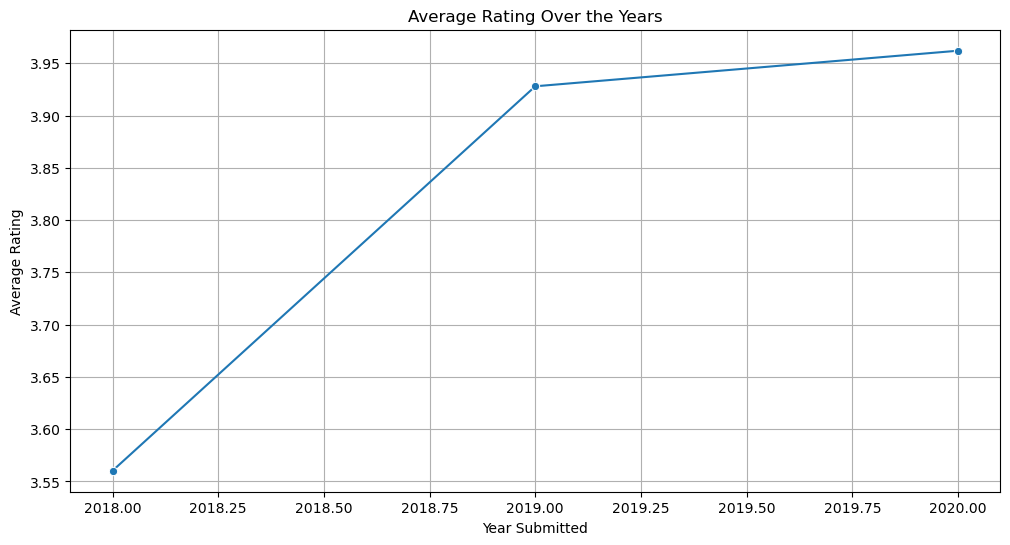

In [51]:
# Ensure 'DateSubmitted' is in datetime format
merged_df['DateSubmitted'] = pd.to_datetime(merged_df['DateSubmitted'])

# Extract the year
merged_df['SubmissionYear'] = merged_df['DateSubmitted'].dt.year

# Calculate the average rating per year
average_rating_by_year = merged_df.groupby('SubmissionYear')['Rating'].mean().reset_index()

# Sort by year
average_rating_by_year = average_rating_by_year.sort_values(by='SubmissionYear')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_year, x='SubmissionYear', y='Rating', palette='crest',marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Year Submitted')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

We do a Line Plot to checktotal count of reviews each year.

Results indicate that highest count of reviews was done in the year 2008 and least number of reviews was done in the year 2019



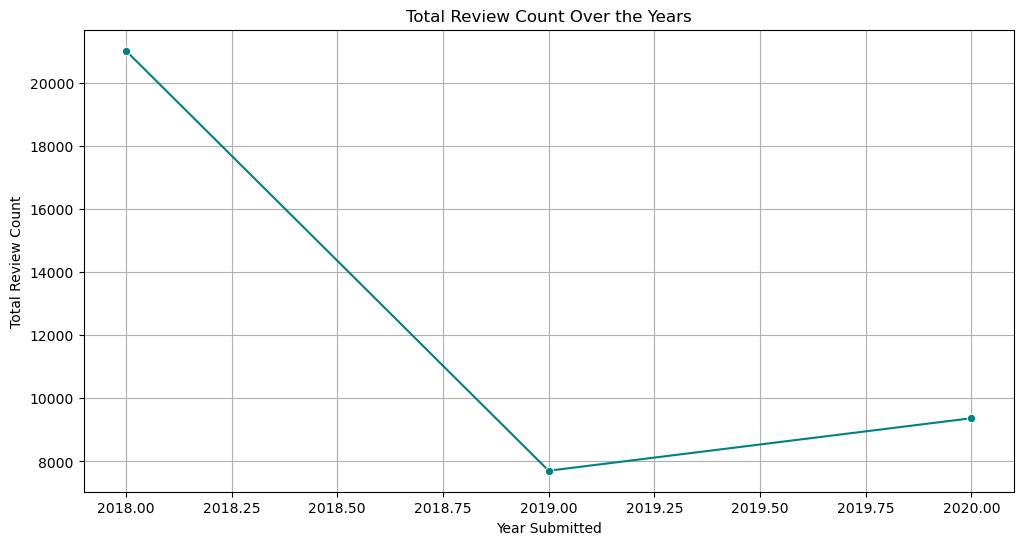

In [52]:
#visualization for reviewcount vs unique year

import matplotlib.pyplot as plt
# Aggregate review counts by year
review_count_by_year = merged_df.groupby('SubmissionYear').size().reset_index(name='ReviewCount')

# Sort by year
review_count_by_year = review_count_by_year.sort_values(by='SubmissionYear')

# Create the visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=review_count_by_year, x='SubmissionYear', y='ReviewCount', color='teal',marker='o')
plt.title('Total Review Count Over the Years')
plt.xlabel('Year Submitted')
plt.ylabel('Total Review Count')
plt.grid(True)
plt.show()

## Visualizations for Recipe Popularity


1. First Plot indicates the top 20 most and least reviewed recipes. This would mean they are the most and least popular recipes.

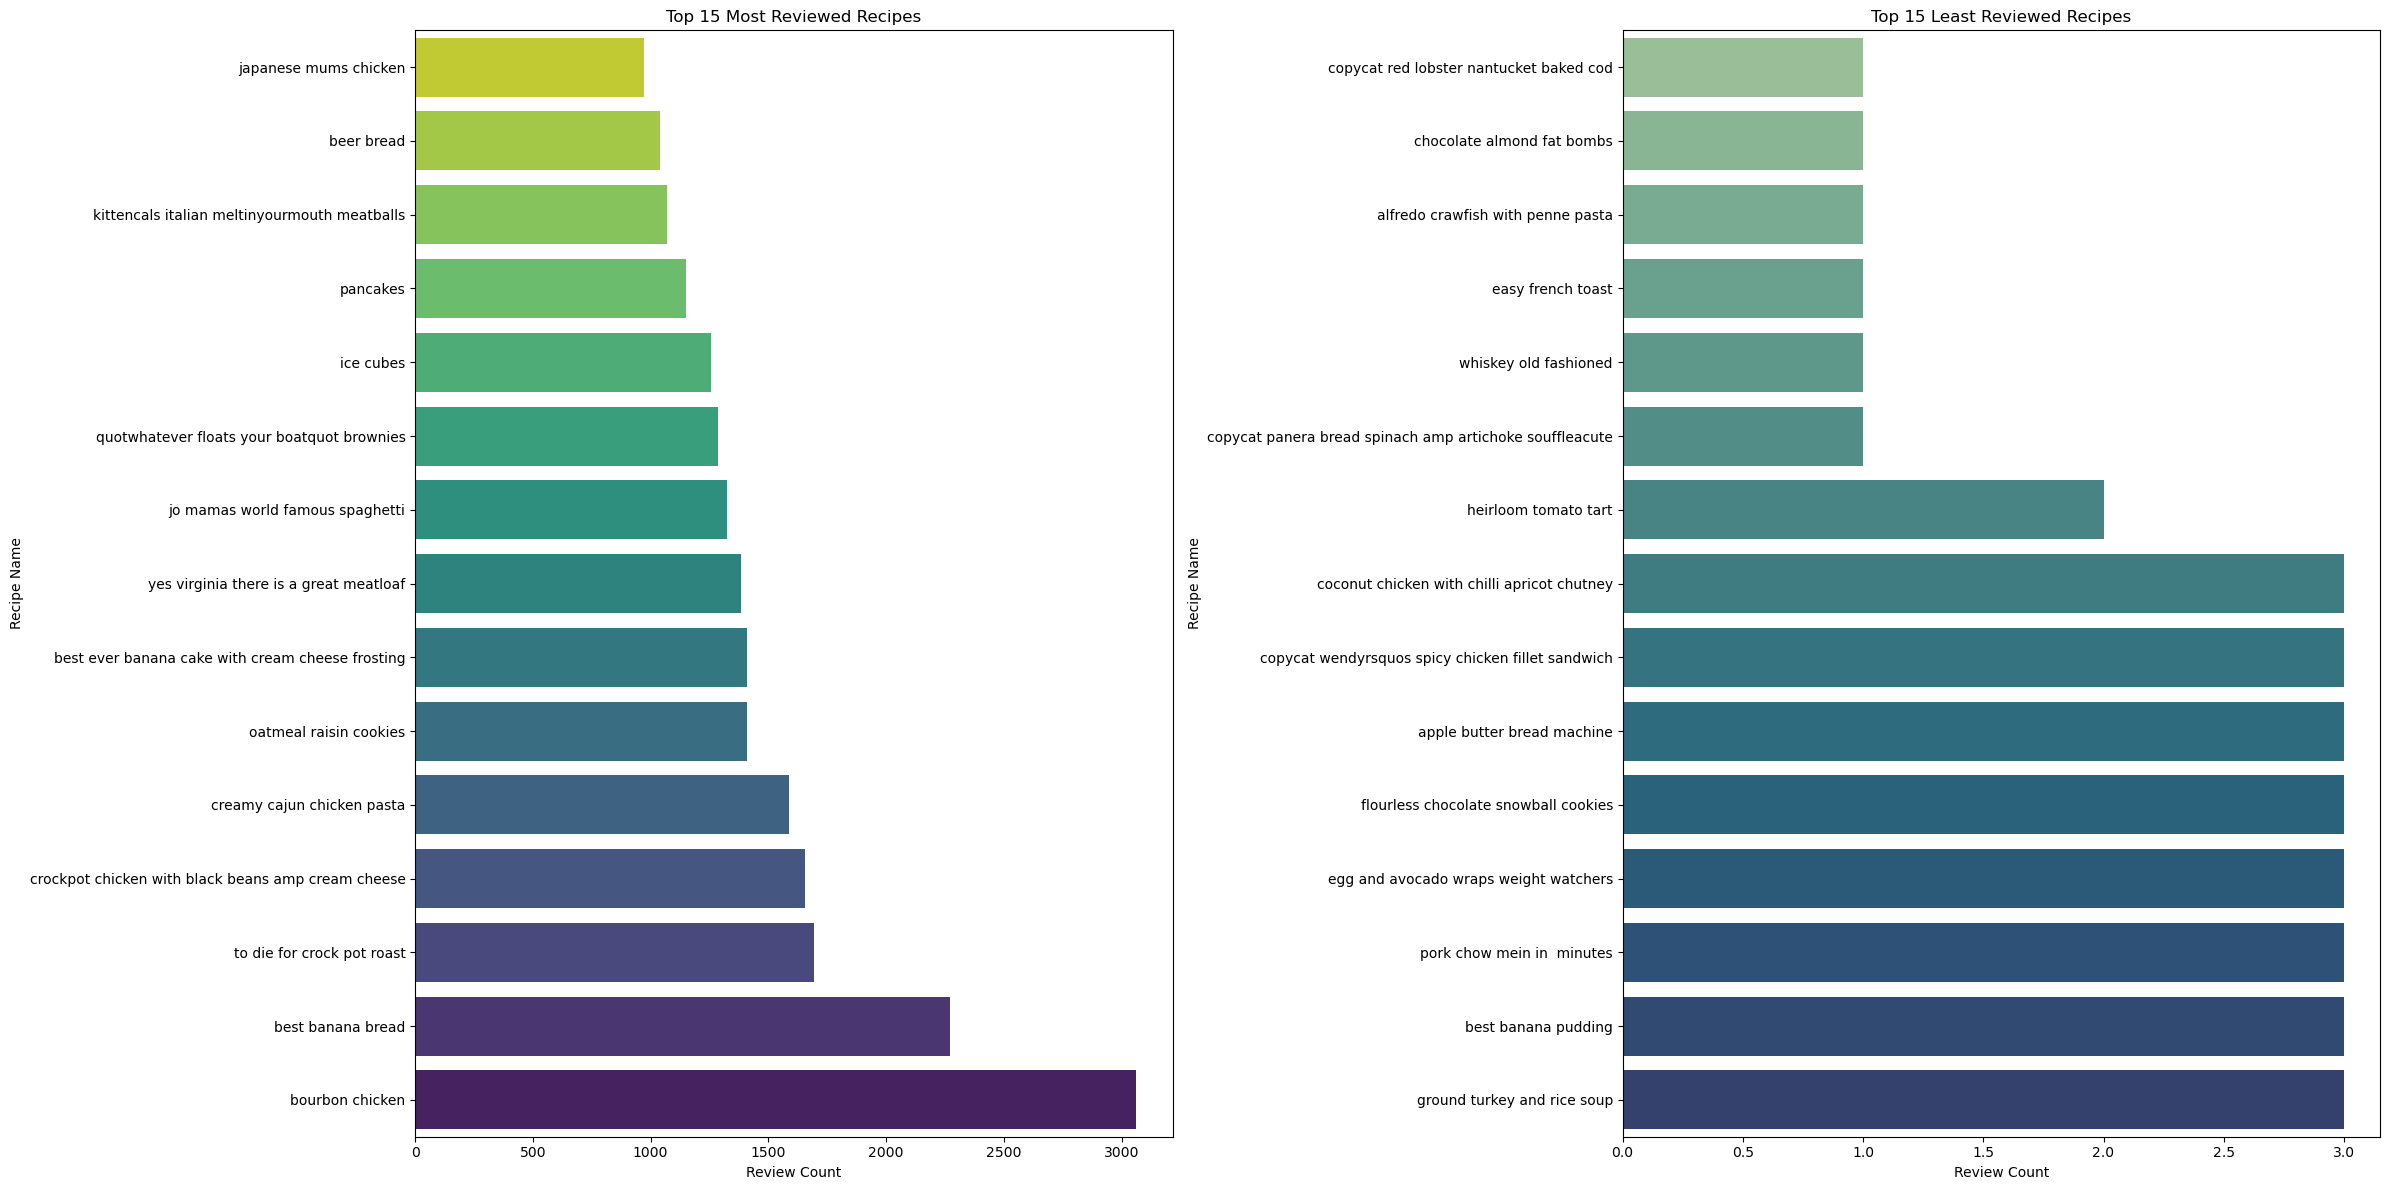

In [53]:
# Set N for top/bottom
top_n = 15

# Sort for most and least reviewed
recipe_reviews_summary = merged_df.groupby(['RecipeId', 'Name'])['ReviewCount'].first().reset_index()
most_reviewed_recipes = recipe_reviews_summary.sort_values(by='ReviewCount', ascending=False).head(top_n)
least_reviewed_recipes = recipe_reviews_summary.sort_values(by='ReviewCount', ascending=True).head(top_n)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharex=False)

# Plot: Most Reviewed
sns.barplot(ax=axes[0], x='ReviewCount', y='Name', data=most_reviewed_recipes, palette='viridis')
axes[0].set_title(f'Top {top_n} Most Reviewed Recipes')
axes[0].set_xlabel('Review Count')
axes[0].set_ylabel('Recipe Name')
axes[0].invert_yaxis()  # Most at top

# Plot: Least Reviewed
sns.barplot(ax=axes[1], x='ReviewCount', y='Name', data=least_reviewed_recipes, palette='crest')
axes[1].set_title(f'Top {top_n} Least Reviewed Recipes')
axes[1].set_xlabel('Review Count')
axes[1].set_ylabel('Recipe Name')
#axes[1].invert_yaxis()  # Least at top

plt.tight_layout()
plt.show()


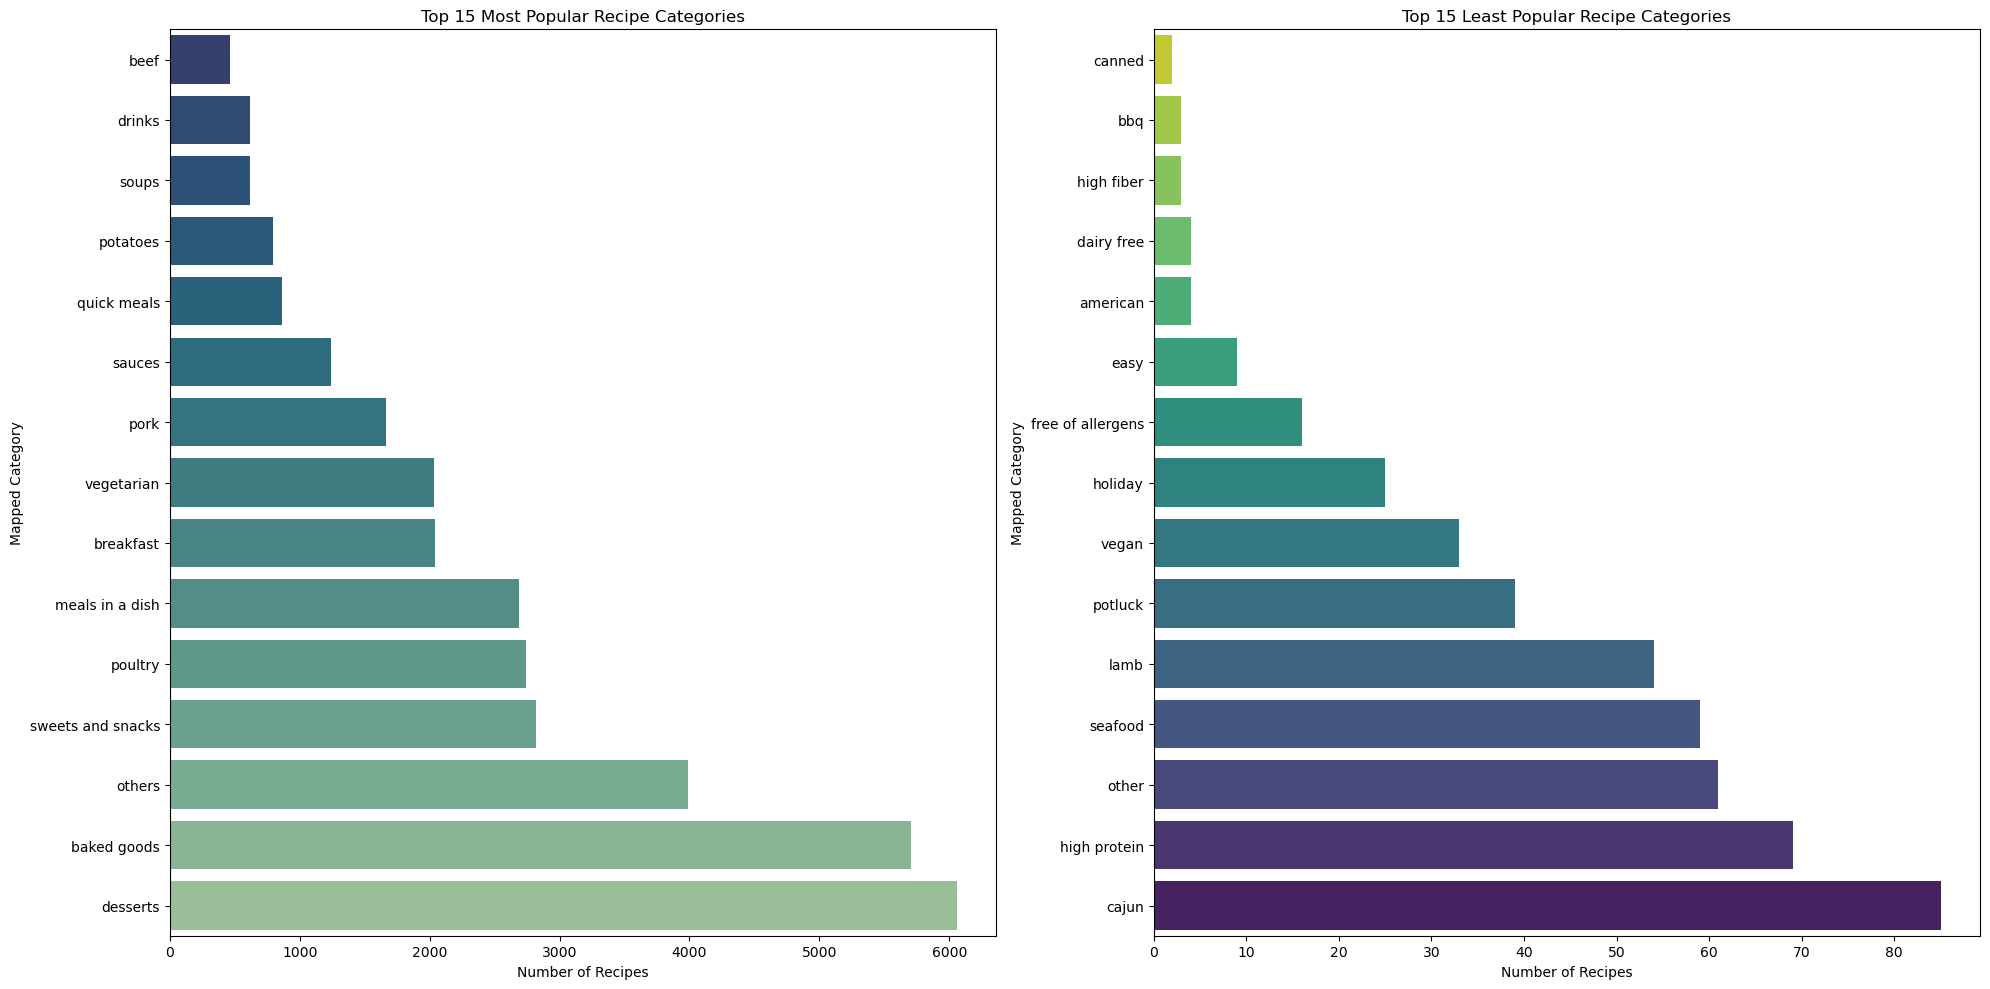

In [54]:
# Set the top and bottom N
top_n_categories = 15
bottom_n_categories = 15

# Prepare data
category_counts = merged_df['MappedCategory'].value_counts().reset_index()
category_counts.columns = ['MappedCategory', 'RecipeCount']
category_counts = category_counts.sort_values(by='RecipeCount', ascending=False)

# Get top and bottom categories
top_categories_plot = category_counts.head(top_n_categories)
bottom_categories_plot = category_counts.tail(bottom_n_categories)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=False)

# Plot: Most Popular Categories
sns.barplot(ax=axes[0], x='RecipeCount', y='MappedCategory', data=top_categories_plot, palette='crest')
axes[0].set_title(f'Top {top_n_categories} Most Popular Recipe Categories')
axes[0].set_xlabel('Number of Recipes')
axes[0].set_ylabel('Mapped Category')
axes[0].invert_yaxis()

# Plot: Least Popular Categories
sns.barplot(ax=axes[1], x='RecipeCount', y='MappedCategory', data=bottom_categories_plot, palette='viridis')
axes[1].set_title(f'Top {bottom_n_categories} Least Popular Recipe Categories')
axes[1].set_xlabel('Number of Recipes')
axes[1].set_ylabel('Mapped Category')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## Visualizations for Nutrition Distribution

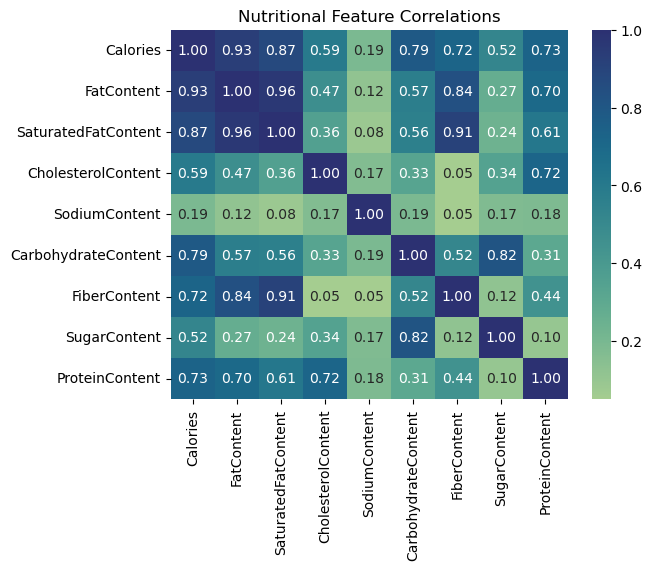

In [55]:
nutrition_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                  'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                  'SugarContent', 'ProteinContent']
corr = merged_df[nutrition_cols].corr()

sns.heatmap(corr, annot=True,cmap='crest', fmt=".2f")
plt.title('Nutritional Feature Correlations')
plt.show()

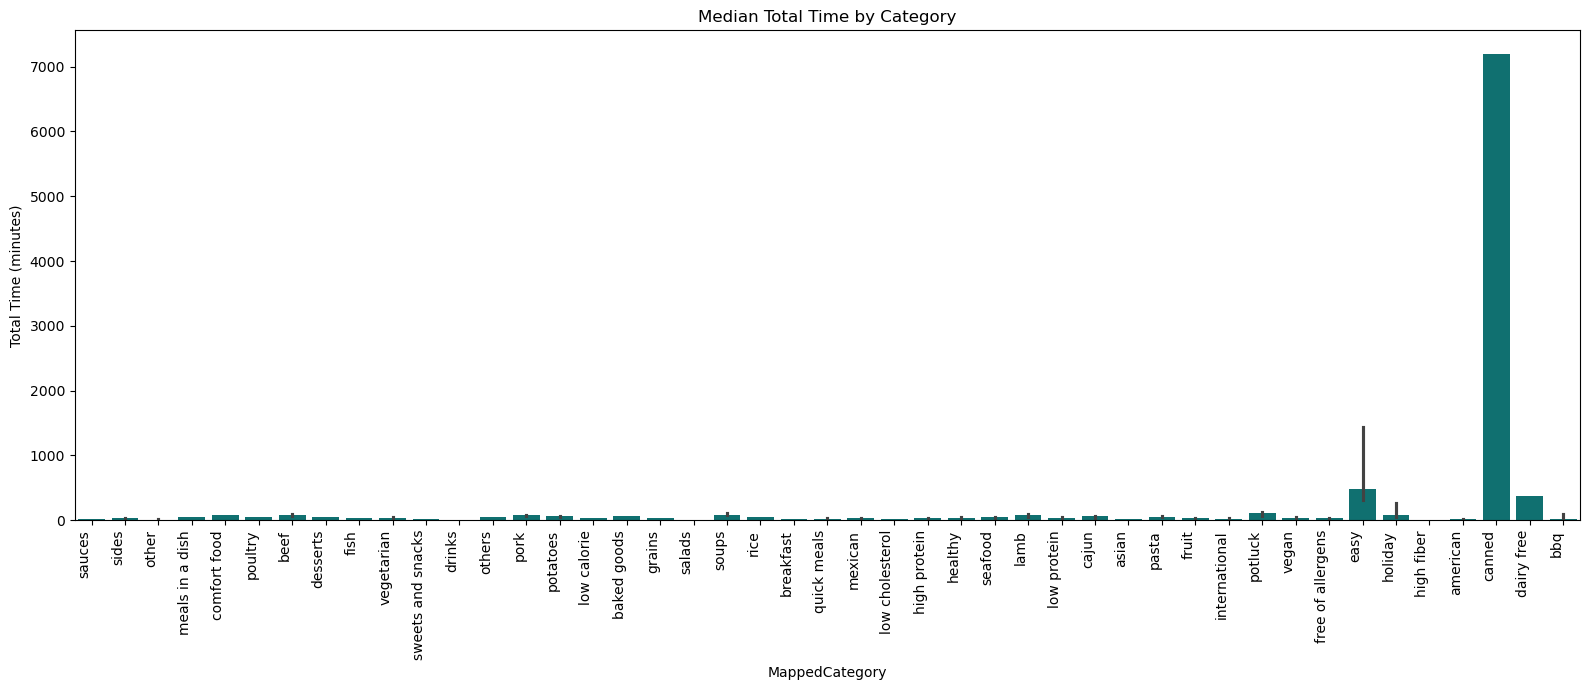

In [56]:
plt.figure(figsize=(16, 7))
sns.barplot(data=merged_df, x='MappedCategory', y='TotalTimeMinutes', estimator='median', color='teal')
plt.title('Median Total Time by Category')
plt.xticks(rotation=45)
plt.ylabel('Total Time (minutes)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

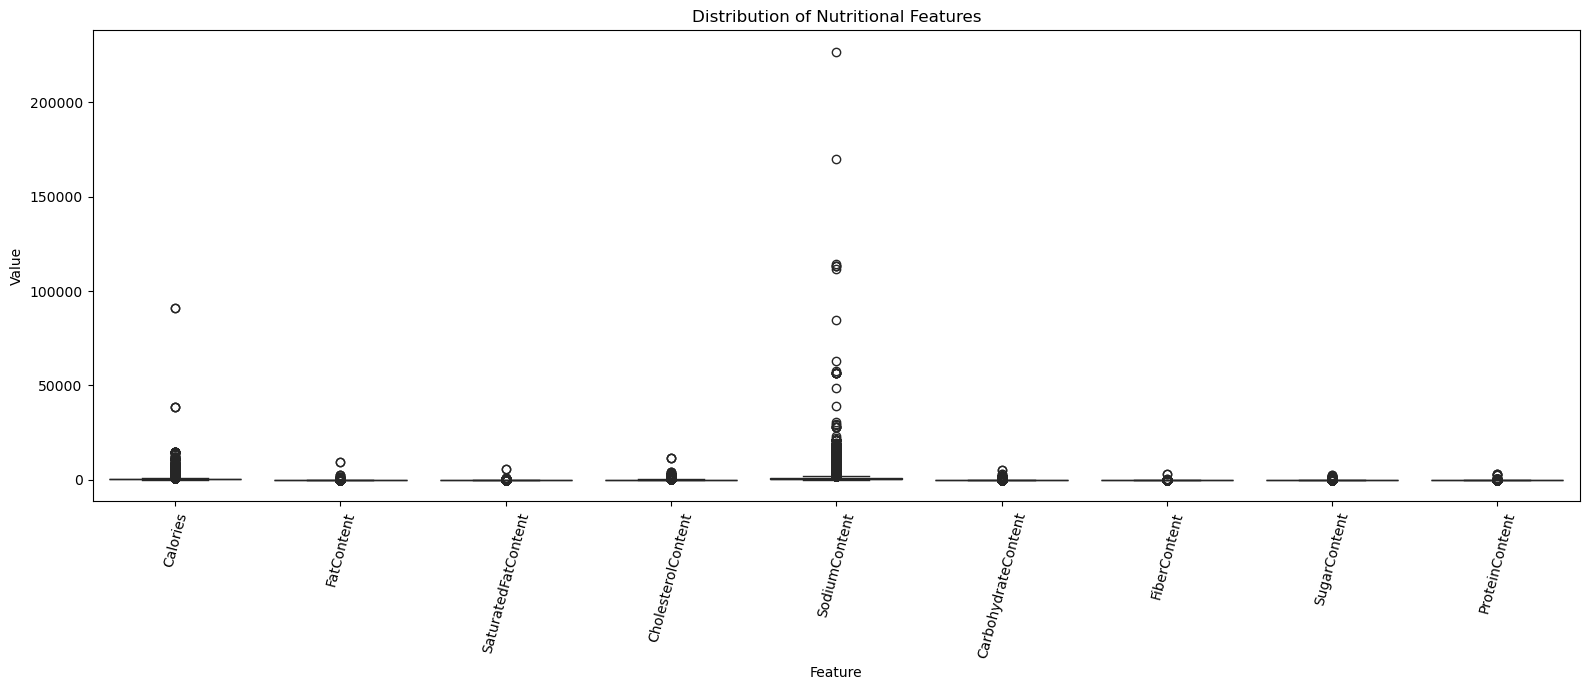

In [57]:
# Melt the DataFrame to long format
numeric_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                  'SugarContent', 'ProteinContent']

melted = merged_df[numeric_cols].melt(var_name='Feature', value_name='Value')

# Boxplot for all features
plt.figure(figsize=(16, 7))
sns.boxplot(data=melted, x='Feature', y='Value', color='teal')
plt.title('Distribution of Nutritional Features')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

## NLP Visualisation 

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, silhouette_score

import nltk
import re
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import KMeans

In [69]:
def tokenize_and_preprocess(reviews):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import SnowballStemmer

    # Get English stop words
    stop_words = stopwords.words('english')
    patt = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s+')

    # Regex for mentions, hashtags, URLs
    mention_hashtag_url_regex = r'(@\w+|#\w+|http\S+|www\S+)'

    # Step 1: Lowercase, remove numbers, remove mentions, hashtags, URLs, stopwords
    preproc_step1 = (
        merged_df.Review
        .str.lower()
        .str.replace(r'[0-9]+', '', regex=True)
        .str.replace(mention_hashtag_url_regex, '', regex=True)
        .str.replace(patt, '', regex=True)
    )

    # Step 2: Tokenize
    preproc1_tokenized = preproc_step1.apply(word_tokenize)

    # Step 3: Clean and stem
    def remove_punct_and_stem(doc_tokenized):
        stemmer = SnowballStemmer('english')
        doc_tokenized = [word for word in doc_tokenized if word.isalpha() and word != 'rt']
        filtered_stemmed_tok = [stemmer.stem(tok) for tok in doc_tokenized]
        return " ".join(filtered_stemmed_tok)

    # Step 4: Apply to each tokenized tweet
    preprocessed = preproc1_tokenized.apply(remove_punct_and_stem)

    return preprocessed

# Apply it
merged_df['preprocessed_text'] = tokenize_and_preprocess(merged_df.Review)

In [74]:
top_categories = merged_df['RecipeCategory'].value_counts().head(5).index
merged_df_top_cat = merged_df[merged_df['RecipeCategory'].isin(top_categories)].copy()

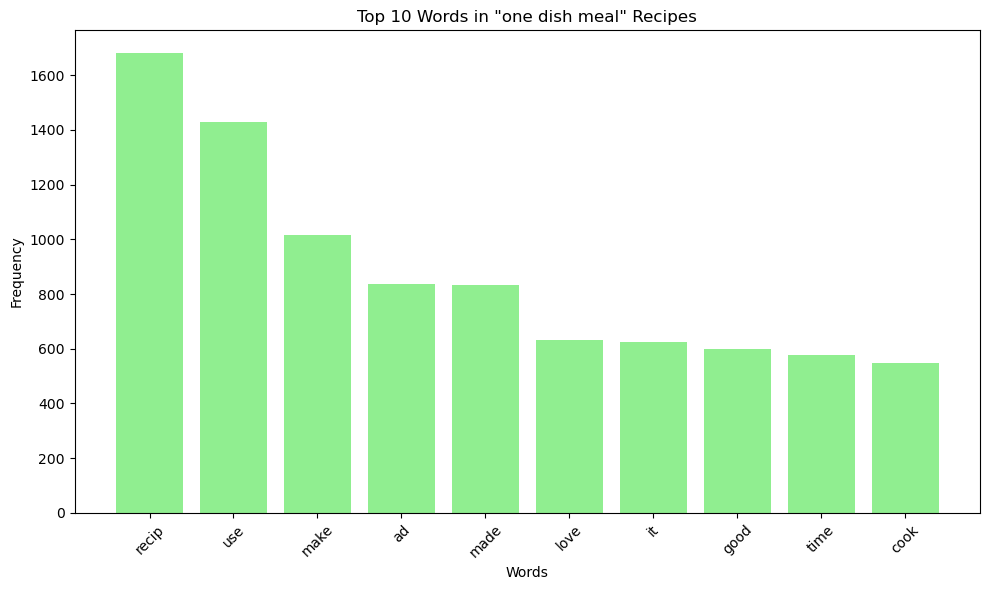

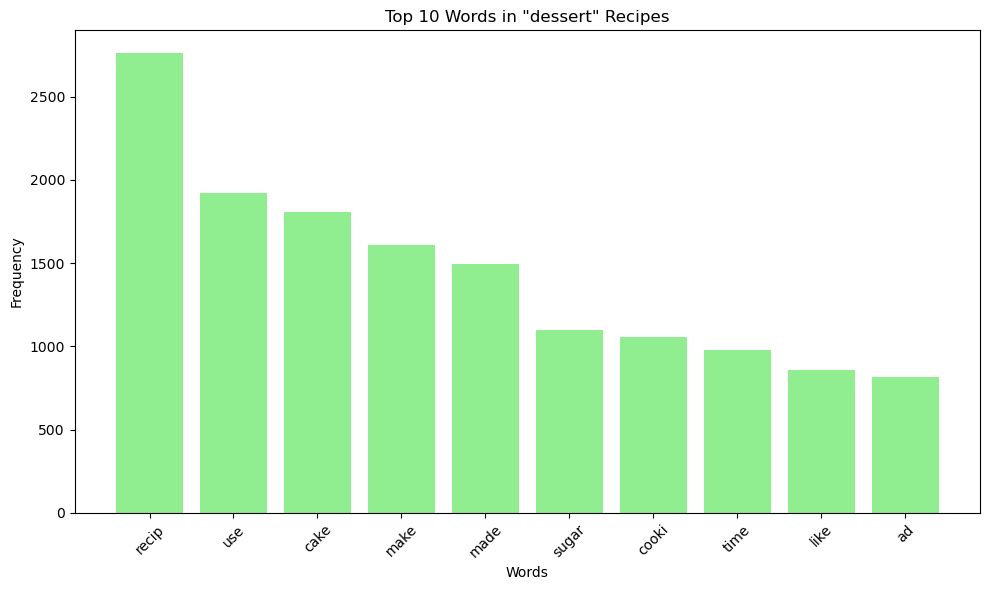

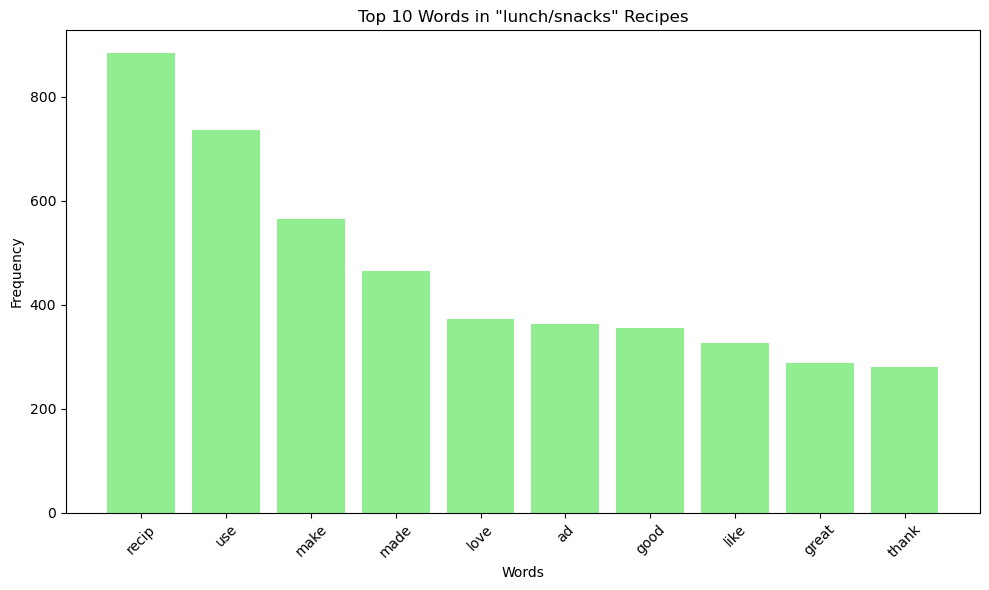

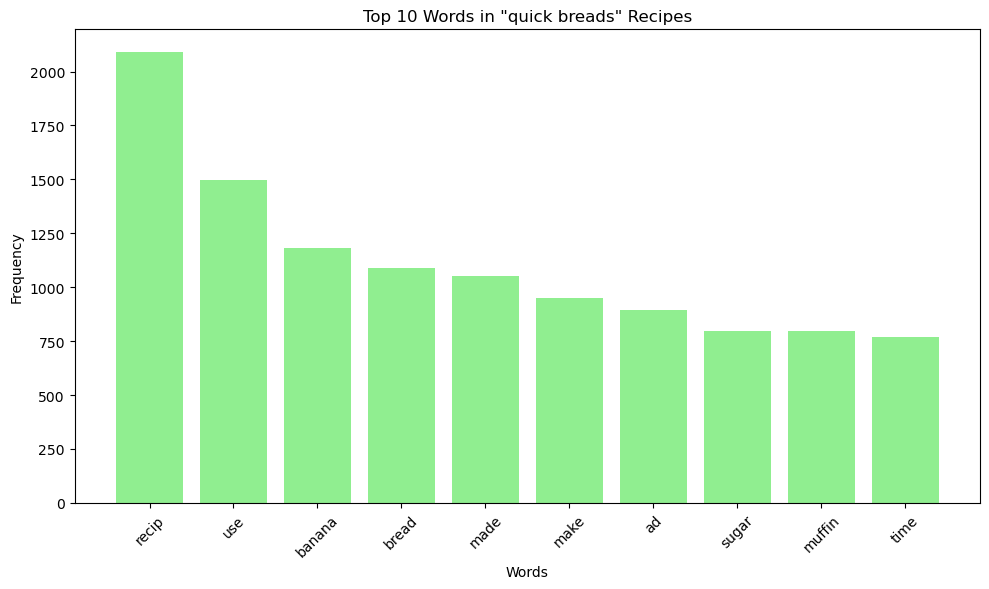

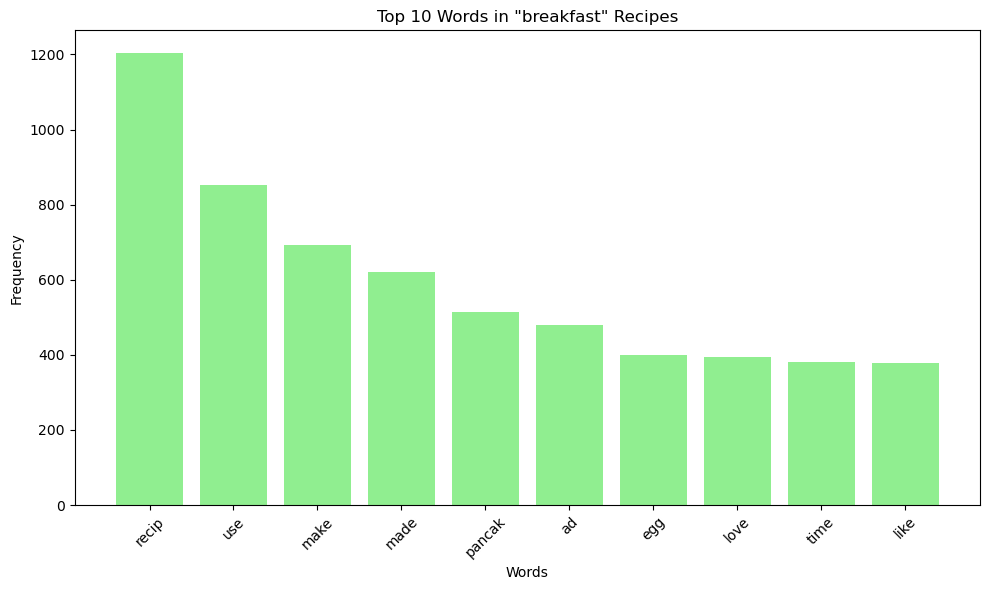

In [76]:
from collections import Counter

# Tokenize each review
merged_df_top_cat['tokens'] = merged_df_top_cat['preprocessed_text'].apply(lambda x: x.split())

# Function to get top N words for a given category
def get_top_words_by_category(merged_df_top_cat, category_name, n=10):
    tokens = merged_df_top_cat[merged_df_top_cat['RecipeCategory'] == category_name]['tokens'].sum()
    counter = Counter(tokens)
    return counter.most_common(n)

# Get unique categories
categories = merged_df_top_cat['RecipeCategory'].unique()
for category in categories:
    top_words = get_top_words_by_category(merged_df_top_cat, category)
    if not top_words:
        continue  # skip empty results

    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='lightgreen')
    plt.title(f'Top 10 Words in "{category}" Recipes')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [81]:
#Extract top 10 words used in our dataframe ingridient column
def clean_ingredient_lists(ingredient_col):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import SnowballStemmer

    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    def clean_ingredient_list(Ingredient):
        cleaned = []
        for item in Ingredient:
            item = item.lower()
            item = re.sub(r'\d+', '', item)  # Remove numbers
            item = re.sub(r'[^\w\s]', '', item)  # Remove punctuation
            if item and item not in stop_words:
                stemmed = stemmer.stem(item)
                cleaned.append(stemmed)
        return cleaned  # or " ".join(cleaned) if you prefer strings

    return ingredient_col.apply(clean_ingredient_list)

#cleaning Ingredient column
merged_df['cleaned_ingredients'] = clean_ingredient_lists(merged_df['Ingredients'])

# Flattening the the list
all_ingredients = merged_df['cleaned_ingredients'].sum()

# Count frequencies and create a table
top_ingredients = Counter(all_ingredients).most_common(10)
summary_table = pd.DataFrame(top_ingredients, columns=['Ingredients', 'Count'])


print(summary_table)

        Ingredients  Count
0              salt  21023
1            butter  14610
2               egg  13190
3             sugar  11640
4             flour   8632
5             onion   8187
6             water   7623
7              milk   7151
8       baking powd   5914
9  allpurpose flour   5785


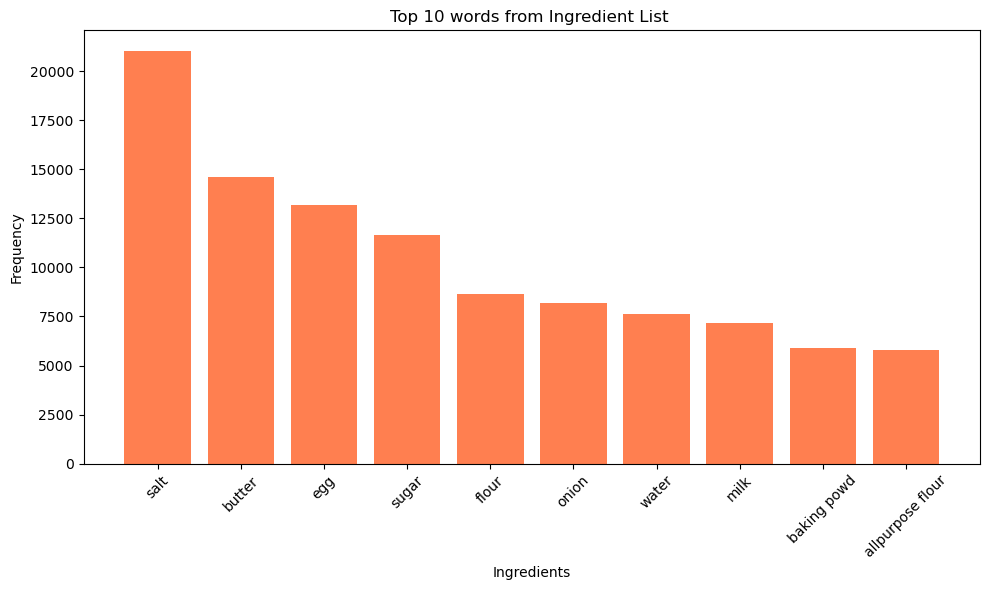

In [82]:
#Plot a bar chart of top ingredients
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Ingredients'], summary_table['Count'], color='coral')
plt.title('Top 10 words from Ingredient List ')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    Keyword  Count
0       min  24513
1      easi  20221
2       low  11911
3      hour  10573
4      oven   9547
5      meat   9215
6    friend   7293
7      cook   7240
8   healthi   6823
9  inexpens   6619


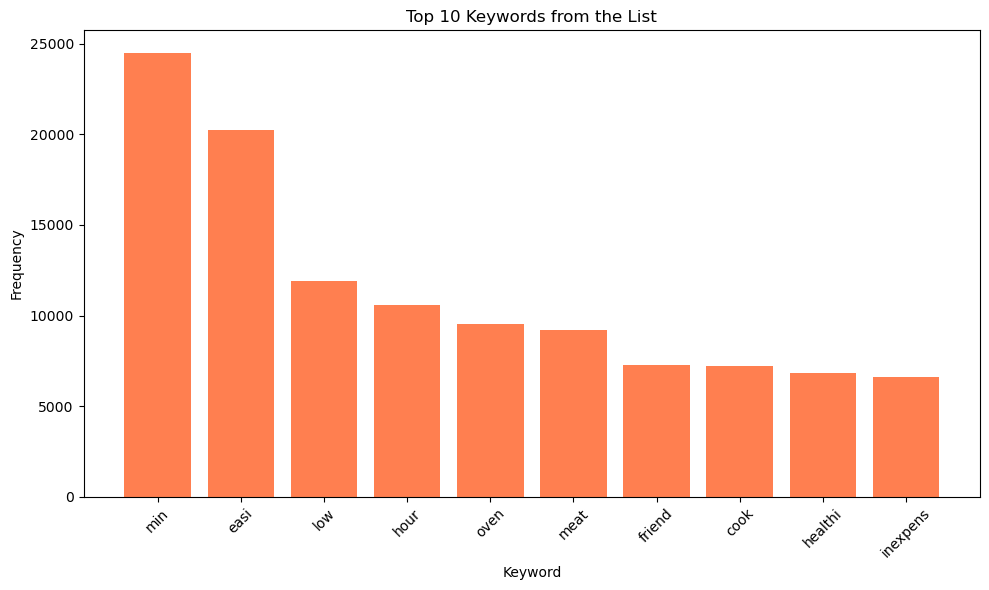

In [83]:
# cleaning step 
def clean_KeywordList_lists(KeywordList_col):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    def clean_KeywordList_list(KeywordList):
        cleaned = []
        for item in KeywordList:
            item = item.lower()
            item = re.sub(r'\d+', '', item)  # Remove numbers
            item = re.sub(r'[^\w\s]', '', item)  # Remove punctuation
            if item and item not in stop_words:
                stemmed = stemmer.stem(item)
                cleaned.append(stemmed)
        return cleaned

    return KeywordList_col.apply(clean_KeywordList_list)

# apply cleaning
merged_df['cleaned_KeywordList'] = clean_KeywordList_lists(merged_df['KeywordList'])

# Flattening the list
all_KeywordList = merged_df['cleaned_KeywordList'].sum()

#Count frequencies and create a table 
top_KeywordList = Counter(all_KeywordList).most_common(10)
summary_table = pd.DataFrame(top_KeywordList, columns=['Keyword', 'Count'])


print(summary_table)

#Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(summary_table['Keyword'], summary_table['Count'], color='coral')
plt.title('Top 10 Keywords from the List')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## Recommender system

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load and prep text data
merged_df['IngredientText'] = merged_df['Ingredients'].astype(str).str.replace('[\[\]\',"]', '', regex=True)

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(merged_df['IngredientText'])

# Fit Nearest Neighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(X)

# create a name-to-index mapping
recipe_indices = pd.Series(merged_df.index, index=merged_df['Name']).drop_duplicates()

# Do a Fuzzy match
from difflib import get_close_matches
def get_closest_recipe_name(name):
    matches = get_close_matches(name, merged_df['Name'], n=1, cutoff=0.6)
    return matches[0] if matches else None

In [113]:
# create a function to iterte through and check for a possible match
def recommend_recipes(name, model=nn_model, top_n=5):
    name = get_closest_recipe_name(name)
    if not name:
        return f"No close match found for '{name}'"

    idx = recipe_indices[name]
    query_vec = X[idx]
    distances, indices_nn = model.kneighbors(query_vec, n_neighbors=top_n + 1)  # +1 to skip itself

    rec_indices = indices_nn[0][1:]  # exclude the original
    return merged_df[['Name', 'RecipeCategory', 'Ingredients', 'AggregatedRating']].iloc[rec_indices]

In [123]:
# Try a recipe

recommend_recipes('lasagna')

,Name,RecipeCategory,Ingredients,AggregatedRating
22677,make ahead italian sausage and pasta bake,one dish meal,"[Italian sausage, olive oil, onions, garlic cl...",5.0
1495,make ahead italian sausage and pasta bake,one dish meal,"[Italian sausage, olive oil, onions, garlic cl...",5.0
7291,make ahead italian sausage and pasta bake,one dish meal,"[Italian sausage, olive oil, onions, garlic cl...",5.0
1883,crispy cheesy chicken parmigiana,chicken breast,"[onion, garlic cloves, parsley, Italian-style ...",5.0
16567,italian meatball soup quick,one dish meal,"[beef broth, tomatoes with onion and garlic, I...",5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

recipe_encoder = LabelEncoder()
author_encoder = LabelEncoder()

merged_df['RecipeId_encoded'] = recipe_encoder.fit_transform(merged_df['RecipeId'])

In [ ]:
#Normalize Nutritional Features
from sklearn.preprocessing import MinMaxScaler

nutritional_cols = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent'
]

scaler = MinMaxScaler()
merged_df[nutritional_cols] = scaler.fit_transform(merged_df[nutritional_cols])

In [ ]:
##Feature Engineering
We are going to categorize recipes that share a theme into recipe categories